# Create Numpy Datasets
From raw image data create numpy arrays of the following shapes:

- image as RGB: $(480, 640, 3)$ with each channel having 8 bit
- depth map : $(480, 640)$ witch a single channel of 32 bit (in docs it states 16)
- pose : $(4, 4)$

In [4]:
# datasets used for transformation
scenes = ["chess", "fire", "heads", "office", "pumpkin", "redkitchen", "stairs"]

In [1]:
import os
import numpy as np
from PIL import Image
from tqdm import tqdm


def create_dataset_PIL(directory: str):
    """
    Convert one of the 7-scenes datasets into numpy arrays.
    
    Parameters
    ----------
    directory:
        the directory from where the data is obtained

    Returns
    ----------
    images: list
        list of all images as np.array of float32
    depths:
        list of all depth maps as np.array of uint32
    poses:
        list of all poses as np.array
    """
    images = []
    depths = []
    poses = []

    for dir in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, dir)):
            for file in tqdm(sorted(os.listdir(os.path.join(directory, dir)))):
                file_path = os.path.join(directory, dir,  file) 

                if file.endswith(".color.png"):  
                    # convert image to floating point and scale to [0,1]
                    image = np.array(Image.open(file_path)) 
                    image = image.astype('float32')
                    image /= 2**8 - 1
                    images.append(image)

                if file.endswith(".depth.png"):
                    depth = np.array(Image.open(file_path))
                    depths.append(depth)
                
                if file.endswith(".pose.txt"):
                    pose = np.loadtxt(file_path)
                    poses.append(pose)

    return images, depths, poses

In [2]:
# convert heads dataset
images, depths, poses = create_dataset_PIL("heads")

100%|██████████| 3000/3000 [00:22<00:00, 134.37it/s]


float32
int32


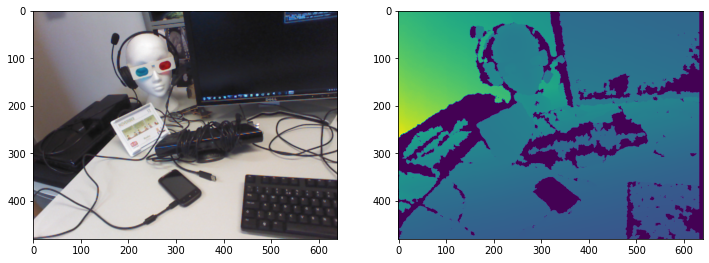

In [3]:
import matplotlib.pyplot as plt

print(images[5].dtype)
print(depths[5].dtype)

_, axes = plt.subplots(1,2, figsize=(12,6))
axes[0].imshow(images[0])
axes[1].imshow(depths[0])
plt.show()